# Mental Stress Detection with Machine Learning

**Loading Data Set and importing libraries**

In [1]:
import pandas as pd
import numpy as np
from wordcloud import STOPWORDS
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("train.csv")

In [3]:
df2=pd.read_csv("test.csv")

In [4]:
df1.shape

(2838, 116)

In [5]:
df2.shape

(715, 116)

In [6]:
df1.sample()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
1124,survivorsofabuse,871ik7,"[25, 30]","We have dinner, we get drinks, and I agree to ...",1372,0,0.571429,1521993067,10,0.979361,...,1.0,1.0,1.0,1.66206,1.49655,1.87903,0.92,16,2.773233,-0.028125


In [7]:
df2.sample()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
412,812,almosthomeless,6lgrqm,"[1, 6]","Backstory: My late grandparents home, the home...",0,0.6,1.499287e+09,7,10.036833,...,1.125,1.125,1.0,1.73949,1.62239,1.92065,0.82,11,9.7075,0.124148


In [8]:
# We merged the two files. We have completed the missing data.
df = pd.concat([df1, df2])

In [9]:
df.shape

(3553, 116)

In [10]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1.535936e+09,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1.516430e+09,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1.539809e+09,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [11]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3553 entries, 0 to 714
Columns: 116 entries, subreddit to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.2+ MB


In [13]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [14]:
from textblob import TextBlob

In [15]:
TextBlob("best").polarity # We find the positive or negative of the words.

1.0

In [16]:
TextBlob("best").sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [17]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [18]:
df3=df[["text"]]

In [19]:
df3.head()

,text
0,"He said he had not felt that way before, sugge..."
1,"Hey there r/assistance, Not sure if this is th..."
2,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h..."
4,October is Domestic Violence Awareness Month a...


In [20]:
df3["sentiment"]=df3["text"].apply(detect_sentiment)

In [21]:
df3.head()

,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


In [22]:
df3.sentiment.value_counts()

sentiment
 0.000000    84
 0.250000    24
 0.100000    23
 0.150000    17
 0.125000    16
             ..
 0.200926     1
-0.009375     1
-0.045833     1
 0.244643     1
 0.136364     1
Name: count, Length: 2627, dtype: int64

**Data Preprocessing Start**

In [23]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

In [24]:
stopwords = set(stopwords.words("english"))

In [25]:
#we clean up unnecessary marks
def clean(text):
    # Convert text to lowercase
    text = str(text).lower()

    # Remove text enclosed in square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove URLs starting with 'http://' or 'https://' and 'www.'
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove any HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove punctuation characters
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove newline characters
    text = re.sub('\n', '', text)

    # Remove words containing digits
    text = re.sub('\w*\d\w*', '', text)

    # Tokenize the text, remove stopwords, and join the words back into a string
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)

    # Perform stemming on the words
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)

    return text

df3["text"] = df3["text"].apply(clean)

In [26]:
df3.head()

,text,sentiment
0,said felt way sugget go rest trigger ahead you...,-0.002742
1,hey rassist sure right place post goe im curr...,0.292857
2,mom hit newspap shock would know dont like pla...,0.011894
3,met new boyfriend amaz kind sweet good student...,0.141671
4,octob domest violenc awar month domest violenc...,-0.204167


In [27]:
df3["label"]=df["label"].map({0: "No Stress", 1: "Stress"})
df3=df3[["text", "label"]]

In [28]:
df3.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [29]:
df3["sentiment"]=df3["text"].apply(detect_sentiment)

In [30]:
df3.head()

,text,label,sentiment
0,said felt way sugget go rest trigger ahead you...,Stress,0.027273
1,hey rassist sure right place post goe im curr...,No Stress,0.340816
2,mom hit newspap shock would know dont like pla...,Stress,0.124091
3,met new boyfriend amaz kind sweet good student...,Stress,0.229172
4,octob domest violenc awar month domest violenc...,Stress,0.083333


In [31]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

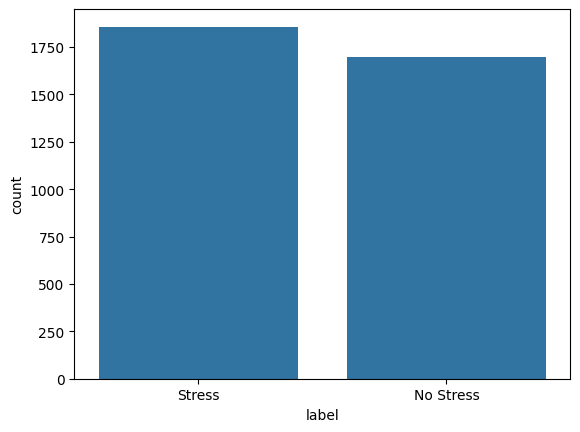

In [32]:
sns.countplot(x=df3.label)

**Data Splitting**

In [66]:
x=df3.text
y=df3.label
df3.head()

,text,label,sentiment
0,said felt way sugget go rest trigger ahead you...,Stress,0.027273
1,hey rassist sure right place post goe im curr...,No Stress,0.340816
2,mom hit newspap shock would know dont like pla...,Stress,0.124091
3,met new boyfriend amaz kind sweet good student...,Stress,0.229172
4,octob domest violenc awar month domest violenc...,Stress,0.083333


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
# CountVectorizer is a class in scikit-learn used for converting text data into a numerical representation. It works by creating a "bag of words" model, where each document (or text) is represented as a vector of word frequencies.
vect=CountVectorizer(stop_words="english")

In [36]:
x=vect.fit_transform(x)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

**Multinomial Naive Bayes**

In [38]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()

In [39]:
pred=mb.fit(x_train,y_train).predict(x_test)

In [40]:
accuracy_score(pred,y_test)

0.7401574803149606

**Decision Tree**

In [41]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [42]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
pred1=d.predict(x_test)

In [44]:
accuracy_score(y_test,pred1)

0.6479190101237345

**Random Forest**

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [65]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
pred2 = rf.predict(x_test)

In [63]:
accuracy_score(y_test, pred2)

0.734533183352081

**Support Vector Machine**

In [49]:
from sklearn.svm import SVC
sv = SVC()

In [50]:
sv.fit(x_train, y_train)

SVC()

In [51]:
pred3 = sv.predict(x_test)

In [52]:
accuracy_score(y_test, pred3)

0.7390326209223848

### Model Testing:

In [53]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [54]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [55]:
user="Today I conducted a workshop for 2 hours returned home and started working on my project. I am feeling very tired. I am not able to concentrate on my work. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything. I am feeling very low. I am not able to sleep properly. I am not able to eat properly. I am not able to do anything."

In [56]:
user = preprocess_text(user)

In [57]:
df4=vect.transform([user]).toarray()
output=mb.predict(df4)
print(output)

['Stress']


**Code to get first post caption of user to predict**

In [58]:
# This line imports the instaloader library, which is used to interact with Instagram profiles and retrieve data from them
import instaloader

In [59]:
def get_first_post_caption(username):
    L = instaloader.Instaloader()

    try:
        profile = instaloader.Profile.from_username(L.context, username)
        posts = profile.get_posts()

        for post in posts:
            caption = post.caption
            if caption:
                return caption

    except Exception as e:
        print(f"Error: {e}")
        return None

if __name__ == "__main__":
    username = input("Enter the Instagram username: ")
    caption = get_first_post_caption(username)

    if caption:
        print("Caption of the first post:")
        print(caption)
        preprocessed = preprocess_text(caption)
        print(preprocessed)
        inp=vect.transform([preprocessed]).toarray()
        output=mb.predict(inp)
        print(output)
    else:
        print("Unable to retrieve the caption.")

Caption of the first post:
Thanks a lot for all your warm wishes, a glimpse of what I did on my birthday.
thanks lot warm wishes glimpse birthday
['No Stress']
